# 🔍 Exploration and Data Preprocessing

In this section, we will take a first look at the data and preprocess it to make it more suitable for our analysis. The following steps will be performed:
1. Download the data from the OpenTransportData platform for the 10th of March 2023.
2. Remove unnecessary columns and translate the column names from German to English.

In [5]:
import pandas as pd
import seaborn as sns

## Download the Data and Keep Interesting Columns

The data is available as a CSV file. We will use the `pandas` library to read the data into a `DataFrame` and keep only the columns that we are interested in. The data contains the following columns:
| Column Name | Type | Description |
| --- | --- | --- |
| `BETRIEBSTAG` | Date (DD.MM.YYYY) | Date of the journey |
| `FAHRT_BEZEICHNER` | String | Identifier of the journey (see https://opentransportdata.swiss/en/cookbook/fahrt-id-journeyref/) |
| `BETREIBER_ID` | String | Identifier of the operator |
| `BETREIBER_ABK` | String | Abbreviation of the operator |
| `BETREIBER_NAME` | String | Name of the operator |
| `PRODUKT_ID` | Category | Identifier of the product |
| `LINIEN_ID` | String | Identifier of the line |
| `LINIEN_TEXT` | String | Name of the line |
| `UMLAUF_ID` | String | Identifier of the circuit (see https://opentransportdata.swiss/en/cookbook/umlauf/)|
| `VERKEHRSMITTEL_TEXT` | String | Type of transport |
| `ZUSATZFAHRT_TF` | Boolean | Whether the journey is an additional one |
| `FAELLT_AUS_TF` | Boolean | Whether the journey is cancelled |
| `BPUIC` | String | Identifier of the stop (see https://didok.ch/en/glossary-stop-points-location-codes/) |
| `HALTESTELLEN_NAME` | String | Name of the stop |
| `ANKUNFTSZEIT` | DateTime (DD.MM.YYYY HH:MM:SS) | Arrival time at the stop |
| `AN_PROGNOSE` | DateTime (DD.MM.YYYY HH:MM:SS) | Arrival time at the stop (predicted) |
| `AN_PROGNOSE_STATUS` | Category | Status of the predicted arrival time |
| `ABFAHRTSZEIT` | DateTime (DD.MM.YYYY HH:MM:SS) | Departure time from the stop |
| `AB_PROGNOSE` | DateTime (DD.MM.YYYY HH:MM:SS) | Departure time from the stop (predicted) |
| `AB_PROGNOSE_STATUS` | Category | Status of the predicted departure time |
| `DURCHFAHRT_TF` | Boolean | Whether the stop is a through stop |

In [6]:
# False if you want to download the data from the internet
LOCAL_DOWNLOAD = True
DATE_FILE = '2023-03-10' # Format YYYY-MM-DD

In [7]:
# Download the data
DATA_LINK = f"https://opentransportdata.swiss/dataset/0edc74a3-ad4d-486e-8657-f8f3b34a0979/resource/9de83058-0365-481d-85fa-a8477709b9fa/download/{DATE_FILE}_istdaten.csv"
DATA_FILE = f"data/{DATE_FILE}_istdaten.csv"
DATA_PATH = DATA_FILE if LOCAL_DOWNLOAD else DATA_LINK
transport_data = pd.read_csv(
    DATA_PATH, 
    sep=';',
    parse_dates=['BETRIEBSTAG', 'ANKUNFTSZEIT', 'AN_PROGNOSE', 'ABFAHRTSZEIT', 'AB_PROGNOSE'],
    dtype={
        'FAHRT_BEZEICHNER': 'string',
        'BETRIEBER_ID': 'string',
        'BETREIBER_ABK': 'string',
        'BETREIBER_NAME': 'string',
        'PRODUKT_ID': 'category',
        'LINIEN_ID': 'string',
        'LINIEN_TEXT': 'string',
        'UMLAUF_ID': 'string',
        'VERKEHRSMITTEL_TEXT': 'string',
        'ZUSATZFAHRT_TF': 'boolean',
        'FAELLT_AUS_TF': 'boolean',
        'BPUIC': 'string',
        'HALTESTELLEN_NAME': 'string',
        'AN_PROGNOSE_STATUS': 'category',
        'AB_PROGNOSE_STATUS': 'category',
        'DURCHFAHRT_TF': 'boolean'
    }
)

In [8]:
transport_data.head()

,BETRIEBSTAG,FAHRT_BEZEICHNER,BETREIBER_ID,BETREIBER_ABK,BETREIBER_NAME,PRODUKT_ID,LINIEN_ID,LINIEN_TEXT,UMLAUF_ID,VERKEHRSMITTEL_TEXT,...,FAELLT_AUS_TF,BPUIC,HALTESTELLEN_NAME,ANKUNFTSZEIT,AN_PROGNOSE,AN_PROGNOSE_STATUS,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,DURCHFAHRT_TF
0,2023-10-03,80:800631:17230:000,80:800631,DB,DB Regio AG Baden-Württemberg,Zug,17230,RB,<NA>,RB,...,False,8500090,Basel Bad Bf,2023-10-03 04:59:00,2023-10-03 04:59:00,PROGNOSE,NaT,NaT,NaN,False
1,2023-10-03,80:800631:17233:000,80:800631,DB,DB Regio AG Baden-Württemberg,Zug,17233,RB,<NA>,RB,...,False,8500090,Basel Bad Bf,NaT,NaT,NaN,2023-10-03 06:07:00,2023-10-03 06:07:00,PROGNOSE,False
2,2023-10-03,80:800631:17234:000,80:800631,DB,DB Regio AG Baden-Württemberg,Zug,17234,RB,<NA>,RB,...,True,8500090,Basel Bad Bf,2023-10-03 05:56:00,NaT,UNBEKANNT,NaT,NaT,UNBEKANNT,False
3,2023-10-03,80:800631:17235:000,80:800631,DB,DB Regio AG Baden-Württemberg,Zug,17235,RB,<NA>,RB,...,False,8500090,Basel Bad Bf,NaT,NaT,NaN,2023-10-03 06:43:00,2023-10-03 06:43:00,PROGNOSE,False
4,2023-10-03,80:800631:17236:000,80:800631,DB,DB Regio AG Baden-Württemberg,Zug,17236,RB,<NA>,RB,...,False,8500090,Basel Bad Bf,2023-10-03 06:33:00,2023-10-03 06:37:00,PROGNOSE,NaT,NaT,NaN,False


In [9]:
transport_data.dtypes

BETRIEBSTAG            datetime64[ns]
FAHRT_BEZEICHNER               string
BETREIBER_ID                   object
BETREIBER_ABK                  string
BETREIBER_NAME                 string
PRODUKT_ID                   category
LINIEN_ID                      string
LINIEN_TEXT                    string
UMLAUF_ID                      string
VERKEHRSMITTEL_TEXT            string
ZUSATZFAHRT_TF                boolean
FAELLT_AUS_TF                 boolean
BPUIC                          string
HALTESTELLEN_NAME              string
ANKUNFTSZEIT           datetime64[ns]
AN_PROGNOSE            datetime64[ns]
AN_PROGNOSE_STATUS           category
ABFAHRTSZEIT           datetime64[ns]
AB_PROGNOSE            datetime64[ns]
AB_PROGNOSE_STATUS           category
DURCHFAHRT_TF                 boolean
dtype: object

## Translate Column Names

In [10]:
translations = {
    'BETRIEBSTAG': 'date',
    'FAHRT_BEZEICHNER': 'trip_id',
    'BETREIBER_ID': 'operator_id',
    'BETREIBER_ABK': 'operator_abbreviation',
    'BETREIBER_NAME': 'operator_name',
    'PRODUKT_ID': 'product_id',
    'LINIEN_ID': 'line_id',
    'LINIEN_TEXT': 'line_text',
    'UMLAUF_ID': 'circuit_id',
    'VERKEHRSMITTEL_TEXT': 'transport_type',
    'ZUSATZFAHRT_TF': 'is_additional_trip',
    'FAELLT_AUS_TF': 'is_cancelled',
    'BPUIC': 'stop_id',
    'HALTESTELLEN_NAME': 'stop_name',
    'ANKUNFTSZEIT': 'arrival_time',
    'AN_PROGNOSE': 'arrival_forecast',
    'AN_PROGNOSE_STATUS': 'arrival_forecast_status',
    'ABFAHRTSZEIT': 'departure_time',
    'AB_PROGNOSE': 'departure_forecast',
    'AB_PROGNOSE_STATUS': 'departure_forecast_status',
    'DURCHFAHRT_TF': 'is_through_trip'
}

transport_data = transport_data.rename(columns=translations)
transport_data.head()

,date,trip_id,operator_id,operator_abbreviation,operator_name,product_id,line_id,line_text,circuit_id,transport_type,...,is_cancelled,stop_id,stop_name,arrival_time,arrival_forecast,arrival_forecast_status,departure_time,departure_forecast,departure_forecast_status,is_through_trip
0,2023-10-03,80:800631:17230:000,80:800631,DB,DB Regio AG Baden-Württemberg,Zug,17230,RB,<NA>,RB,...,False,8500090,Basel Bad Bf,2023-10-03 04:59:00,2023-10-03 04:59:00,PROGNOSE,NaT,NaT,NaN,False
1,2023-10-03,80:800631:17233:000,80:800631,DB,DB Regio AG Baden-Württemberg,Zug,17233,RB,<NA>,RB,...,False,8500090,Basel Bad Bf,NaT,NaT,NaN,2023-10-03 06:07:00,2023-10-03 06:07:00,PROGNOSE,False
2,2023-10-03,80:800631:17234:000,80:800631,DB,DB Regio AG Baden-Württemberg,Zug,17234,RB,<NA>,RB,...,True,8500090,Basel Bad Bf,2023-10-03 05:56:00,NaT,UNBEKANNT,NaT,NaT,UNBEKANNT,False
3,2023-10-03,80:800631:17235:000,80:800631,DB,DB Regio AG Baden-Württemberg,Zug,17235,RB,<NA>,RB,...,False,8500090,Basel Bad Bf,NaT,NaT,NaN,2023-10-03 06:43:00,2023-10-03 06:43:00,PROGNOSE,False
4,2023-10-03,80:800631:17236:000,80:800631,DB,DB Regio AG Baden-Württemberg,Zug,17236,RB,<NA>,RB,...,False,8500090,Basel Bad Bf,2023-10-03 06:33:00,2023-10-03 06:37:00,PROGNOSE,NaT,NaT,NaN,False


## S9

In [15]:
transport_data[(transport_data['stop_name'] == 'Moudon') & (transport_data['line_text'] == 'S9')].head()

,date,trip_id,operator_id,operator_abbreviation,operator_name,product_id,line_id,line_text,circuit_id,transport_type,...,is_cancelled,stop_id,stop_name,arrival_time,arrival_forecast,arrival_forecast_status,departure_time,departure_forecast,departure_forecast_status,is_through_trip
44537,2023-10-03,85:11:24909:001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,24909,S9,<NA>,S,...,False,8504120,Moudon,2023-10-03 05:51:00,2023-10-03 05:52:26,REAL,2023-10-03 05:52:00,2023-10-03 05:52:49,REAL,False
44570,2023-10-03,85:11:24912:001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,24912,S9,<NA>,S,...,False,8504120,Moudon,2023-10-03 06:05:00,2023-10-03 06:09:02,REAL,2023-10-03 06:05:00,2023-10-03 06:10:12,REAL,False
44583,2023-10-03,85:11:24913:001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,24913,S9,<NA>,S,...,False,8504120,Moudon,2023-10-03 06:51:00,2023-10-03 06:52:56,REAL,2023-10-03 06:52:00,2023-10-03 06:53:19,REAL,False
44603,2023-10-03,85:11:24917:001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,24917,S9,<NA>,S,...,False,8504120,Moudon,2023-10-03 07:51:00,2023-10-03 07:53:45,REAL,2023-10-03 07:52:00,2023-10-03 07:54:04,REAL,False
44630,2023-10-03,85:11:24918:001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,24918,S9,<NA>,S,...,False,8504120,Moudon,2023-10-03 07:05:00,2023-10-03 07:07:09,REAL,2023-10-03 07:05:00,2023-10-03 07:08:05,REAL,False


In [16]:
transport_data[(transport_data['stop_name'] == 'Lucens') & (transport_data['line_text'] == 'S9')].head()

,date,trip_id,operator_id,operator_abbreviation,operator_name,product_id,line_id,line_text,circuit_id,transport_type,...,is_cancelled,stop_id,stop_name,arrival_time,arrival_forecast,arrival_forecast_status,departure_time,departure_forecast,departure_forecast_status,is_through_trip
44538,2023-10-03,85:11:24909:001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,24909,S9,<NA>,S,...,False,8504121,Lucens,2023-10-03 05:57:00,2023-10-03 05:57:07,REAL,2023-10-03 05:59:00,2023-10-03 06:03:37,REAL,False
44569,2023-10-03,85:11:24912:001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,24912,S9,<NA>,S,...,False,8504121,Lucens,2023-10-03 05:59:00,2023-10-03 06:03:23,REAL,2023-10-03 06:00:00,2023-10-03 06:04:36,REAL,False
44584,2023-10-03,85:11:24913:001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,24913,S9,<NA>,S,...,False,8504121,Lucens,2023-10-03 06:57:00,2023-10-03 06:57:53,REAL,2023-10-03 06:59:00,2023-10-03 07:02:16,REAL,False
44604,2023-10-03,85:11:24917:001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,24917,S9,<NA>,S,...,False,8504121,Lucens,2023-10-03 07:57:00,2023-10-03 07:58:08,REAL,2023-10-03 07:59:00,2023-10-03 08:03:11,REAL,False
44629,2023-10-03,85:11:24918:001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,24918,S9,<NA>,S,...,False,8504121,Lucens,2023-10-03 06:59:00,2023-10-03 07:02:19,REAL,2023-10-03 07:00:00,2023-10-03 07:03:05,REAL,False


Each line_id represents a line at a given time. 

## Basic Analysis

In [7]:
transport_data.describe()

C:\Users\Ozan\AppData\Local\Temp\ipykernel_11744\669156617.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  transport_data.describe()
C:\Users\Ozan\AppData\Local\Temp\ipykernel_11744\669156617.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  transport_data.describe()
C:\Users\Ozan\AppData\Local\Temp\ipykernel_11744\669156617.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  transp

,date,trip_id,operator_id,operator_abbreviation,operator_name,product_id,line_id,line_text,circuit_id,transport_type,...,is_cancelled,stop_id,stop_name,arrival_time,arrival_forecast,arrival_forecast_status,departure_time,departure_forecast,departure_forecast_status,is_through_trip
count,2347175,2347175,2347175,2347175,2347175,2347042,2347175,2347175,1137342,2339682,...,2347175,2347175,2188441,2207604,2179615,2207980,2207949,2179175,2208289,2347175
unique,1,141527,135,130,126,7,13601,936,2835,28,...,2,21200,19967,1622,81362,4,1614,81462,4,2
top,2023-10-03 00:00:00,85:841:502-2082,85:801,PAG,PostAuto AG,Bus,85:827:10,1,601,B,...,False,8576646,"Bern, Bahnhof",2023-10-03 07:38:00,2023-10-03 16:59:00,REAL,2023-10-03 17:05:00,2023-10-03 16:55:00,REAL,False
freq,2347175,79,364633,364633,364633,1777815,14112,104034,3801,1905018,...,2323023,3844,3837,2583,141,1656758,2631,142,1700550,2347167
first,2023-10-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2023-10-03 00:00:00,2023-10-03 00:00:53,NaN,2023-10-03 00:00:00,2023-10-03 00:00:18,NaN,NaN
last,2023-10-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2023-11-03 05:07:00,2023-11-03 05:56:41,NaN,2023-11-03 05:05:00,2023-11-03 05:56:41,NaN,NaN


In [8]:
transport_data[(transport_data["is_cancelled"])]["line_id"]

2               17234
39              17275
42              17278
143             17185
148             17192
              ...    
2305961    85:896:152
2305962    85:896:152
2305963    85:896:152
2305964    85:896:152
2305965    85:896:152
Name: line_id, Length: 24152, dtype: string

In [9]:
# Here we compute the number of lines that had cancellation
num_cancelled = transport_data[(transport_data["is_cancelled"])]["line_id"].unique().shape[0]
num_cancelled

634

In [10]:
# The total number of lines that day
num_lines = transport_data["line_id"].unique().shape[0]
num_lines

13601

In [11]:
# The percentage of lines that had cancellation
print(f"{num_cancelled / num_lines: .2%}")

 4.66%


In [12]:
# We add a new column to the datafram that contains the delay in minutes
transport_data["arrival_delay"] = (transport_data["arrival_forecast"] - transport_data["arrival_time"]).dt.total_seconds() / 60
transport_data["departure_delay"] = (transport_data["departure_forecast"] - transport_data["departure_time"]).dt.total_seconds() / 60

transport_data[['arrival_delay', 'departure_delay']].describe().apply(lambda s: s.apply('{0:.5f}'.format))

,arrival_delay,departure_delay
count,2179615.00000,2179175.00000
mean,13.30585,16.35844
std,939.24639,930.11573
min,-44642.01667,-44639.85000
25%,0.36667,0.53333
50%,1.08333,1.23333
75%,2.05000,2.20000
max,43918.68333,43918.68333


In [13]:
# Only take rows where the arrival and delay forecast are "REAL"
(transport_data[(transport_data["arrival_forecast_status"] == "REAL") & (transport_data["departure_forecast_status"] == "REAL")]).describe().apply(lambda s: s.apply('{0:.5f}'.format))

,arrival_delay,departure_delay
count,1541021.00000,1541020.00000
mean,14.68852,17.53164
std,899.26426,912.58915
min,-44640.73333,-44639.85000
25%,0.51667,0.68333
50%,1.18333,1.36667
75%,2.11667,2.30000
max,43229.21667,43249.11667


<AxesSubplot: xlabel='arrival_delay', ylabel='Count'>

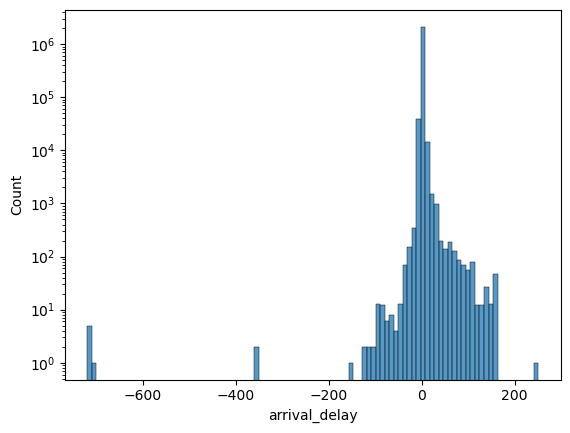

In [14]:
# This histogram coressponds to the delays in minutes for each arrival of each line (we remove the outliers)
sns.histplot(data=transport_data[(transport_data["arrival_delay"] > -10000) & (transport_data["arrival_delay"] < 10000)], x="arrival_delay", bins=100, log_scale=(False, True))

<AxesSubplot: xlabel='departure_delay', ylabel='Count'>

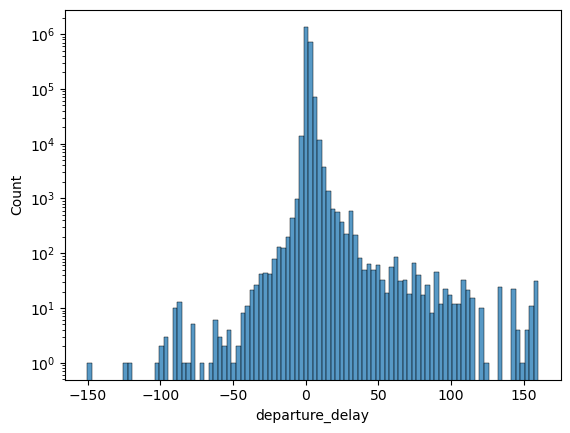

In [15]:
# This histogram coressponds to the delays in minutes for each departure of each line (we remove the outliers)
sns.histplot(data=transport_data[(transport_data["departure_delay"] > -200) & (transport_data["departure_delay"] < 200)], x="departure_delay", bins=100, log_scale=(False, True))

We can see that the distributions on a logarithmic y are bi-modal. They seem to follow a laplace distribution centered around 0.

<AxesSubplot: xlabel='departure_delay', ylabel='Count'>

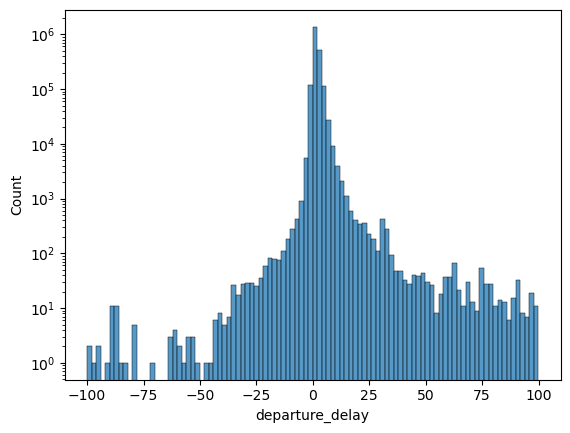

In [19]:
# This histogram coressponds to the delays in minutes for each departure of each line (we remove the outliers)
sns.histplot(data=transport_data[(transport_data["departure_delay"] > -100) & (transport_data["departure_delay"] < 100)], x="departure_delay", bins=100, log_scale=(False, True))

<AxesSubplot: xlabel='arrival_delay', ylabel='Count'>

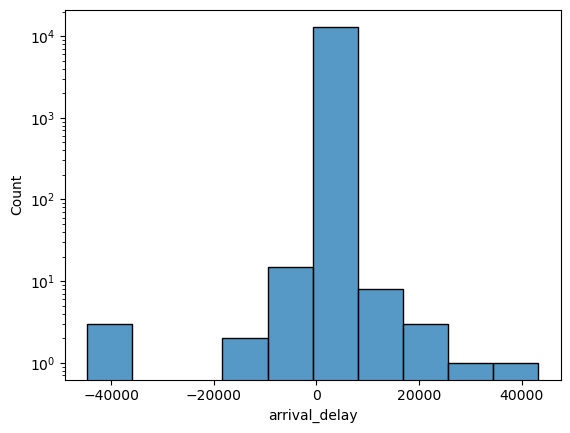

In [17]:
sns.histplot(data=transport_data.groupby("line_id").mean(numeric_only=True), x="arrival_delay", bins=10, log_scale=(False, True))

<AxesSubplot: xlabel='departure_delay', ylabel='Count'>

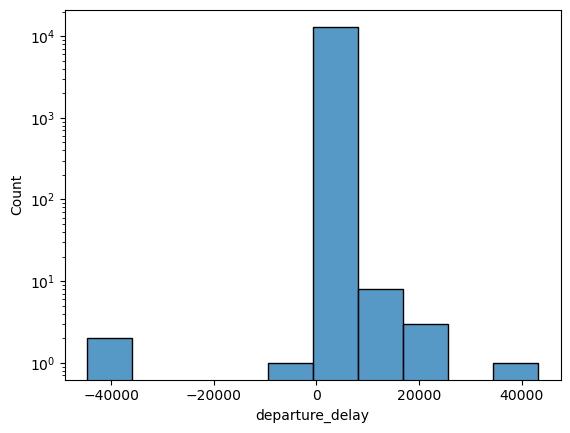

In [18]:
sns.histplot(data=transport_data.groupby("line_id").mean(numeric_only=True), x="departure_delay", bins=10, log_scale=(False, True))